# Discrete Distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

## Binomial Coefficient

The Python package `scipy.special` includes the function `scipy.special.factorial` to compute the factorial

$$
n! = n(n-1)(n-2) \cdots (2)(1)
$$

and the function `scipy.special.comb` to compute the [binomial coefficient](https://en.wikipedia.org/wiki/Binomial_coefficient)

$$
{ n \choose k } = \frac{n!}{k!(n-k)!}
$$

The binomial coefficient ${n \choose k}$ is the number of combinations of $k$ elements chosen from a set of $n$ elements.

For example, compute $7!$:

In [2]:
sp.factorial(7)

5040.0

Compute ${5 \choose 2}$:

In [3]:
sp.comb(5,2)

10.0

Compute ${5 \choose 2}$ using the formula $\frac{5!}{2!(5-2)!}$:

In [4]:
sp.factorial(5)/(sp.factorial(5-2)*sp.factorial(2))

10.0

Let's plot the binomial coefficient (for fixed `n`) as a function of `k`.

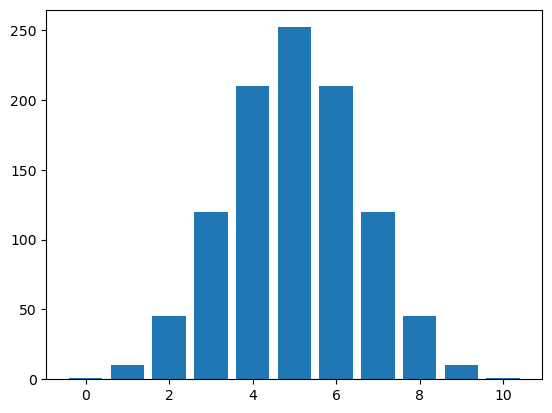

In [5]:
n = 10
k = np.arange(0,n+1)
b = sp.comb(n,k)
plt.bar(k,b)
plt.show()

Look at the array of binomial coefficients:

In [6]:
print(b)

[  1.  10.  45. 120. 210. 252. 210. 120.  45.  10.   1.]


## Random Sampling

The Python package NumPy contains a subpackage `numpy.random` which includes functions to generate random numbers. For example, the function `np.random.randint(a,b,size=(n,m))` generates a $n \times m$ matrix of integers sampled from the half-closed interval $[a,b)$ with equal probability.

### Flipping Coins

Simulate flipping 2 coins 5 times (where tails is 0 and heads is 1):

In [7]:
flips = np.random.randint(0,2,size=(5,2))
print(flips)

[[1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]]


### Rolling Dice

Simulate rolling 3 dice 10 times:

In [8]:
rolls = np.random.randint(1,7,size=(10,3))
print(rolls)

[[4 3 5]
 [2 1 1]
 [5 1 2]
 [1 5 4]
 [1 4 3]
 [4 3 4]
 [2 6 1]
 [6 6 2]
 [5 3 3]
 [4 6 2]]


### Drawing Cards

Use the function `numpy.random.choice` to randomly choose elements from a set. For example, we can create a deck of cards as a Python list with text entries (each text entry represents a card in the standard deck) and then draw a certain number of them (without replacement).

In [9]:
deck = ['2H','3H','4H','5H','6H','7H','8H','9H','10H','JH','QH','KH','AH',
        '2D','3D','4D','5D','6D','7D','8D','9D','10D','JD','QD','KD','AD',
        '2S','3S','4S','5S','6S','7S','8S','9S','10S','JS','QS','KS','AS',
        '2C','3C','4C','5C','6C','7C','8C','9C','10C','JC','QC','KC','AC']

hand = np.random.choice(deck,size=5,replace=False)
print(hand)

['JS' 'AC' 'KC' '10D' '10H']


Write a list comprehension to simulate drawing 5 cards 10 times:

In [10]:
hands = np.array([np.random.choice(deck,size=5,replace=False) for _ in range(10)])
print(hands)

[['JC' 'JS' '2D' '10S' '4S']
 ['8H' '10D' '9D' '8S' '3D']
 ['8H' '8D' '10S' '6H' '2D']
 ['3H' '10D' '6D' 'KD' 'AH']
 ['JD' '7S' 'KC' '5D' '3H']
 ['JD' '8S' '8D' '4H' '4C']
 ['AS' 'JC' 'AH' '4H' '10S']
 ['QS' '10H' '9D' '6D' 'JC']
 ['5D' '9D' 'QC' '8D' '4H']
 ['QC' '4C' 'AC' 'QH' '5H']]


### Custom Distributions

We can also define our own custom distributions using the fucntion `np.random.choice`. We specify the sample space `omega` and the corresponding vector of probabilities `probs`.

For example, let's consider a weighted coin such that flips result in heads with probability 2/3 and tails with probability 1/3. Genreate 10 samples of flipping the weighted coin three times.

In [36]:
omega = [0,1]
probs = [1/3,2/3]
n = 10
t = 3
samples = np.random.choice(omega,size=(n,t),p=probs)
print(samples)

[[1 0 1]
 [0 1 0]
 [0 1 1]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [0 0 1]
 [1 1 1]]


## Random Variables

A **random variable** on a sample space $\Omega$ is a function $X : \Omega \to \mathbb{R}$. In the previous section, we constructed random samples as NumPy arrays where each row was the result of a random experiment. In other words, each row was an element in the sample space $\Omega$. Apply NumPy functions such as `np.sum`, `np.max`, `np.min` and `np.any` to simulate random variables.

For example, let's generate random samples of rolling 4 dice.

In [29]:
rolls = np.random.randint(1,7,size=(10,4))
print(rolls)

[[2 1 3 2]
 [1 2 4 5]
 [1 2 5 5]
 [6 3 2 2]
 [5 1 1 6]
 [4 3 6 5]
 [5 2 4 6]
 [2 1 4 2]
 [2 2 2 1]
 [1 3 6 2]]


Use the function `np.sum` to compute the sum of each row.

In [12]:
sum_rolls = np.sum(rolls,axis=1)
print(sum_rolls)

[15 17 20 14 16 13 16 20 12 16]


The parameter `axis=1` specifies that we sum the values of `rolls` across the rows. If we had entered `axis=0` then the result would be the sum down the columns, and if we don't specify then the result is the sum of all values in the array.

We can also use `np.max` and `np.min` to comute the maximum and minimum values in each roll:

In [13]:
max_rolls = np.max(rolls,axis=1)
print(max_rolls)

[5 6 5 6 5 5 5 6 6 6]


The following code computes the random variable which returns 1 if the roll includes a 3 and 0 otherwise.

In [14]:
roll_3 = np.any(rolls == 3,axis=1).astype(int)
print(roll_3)

[1 0 0 0 0 1 0 0 0 0]


## Histograms

Now that we can compute values of random variables on sample spaces of rolling dice and flipping coins, let's visualize results as [histograms](https://en.wikipedia.org/wiki/Histogram).

For example, construct the histogram of 5000 random samples of flipping 5 coins and counting the number of heads.

In [15]:
ncoins = 5
nsamples = 5000
flips = np.random.randint(0,2,size=(nsamples,ncoins))
heads = np.sum(flips,axis=1)

Look at the first 10 samples:

In [16]:
flips[:10]

array([[1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0]])

Look at the sum of the first 10 samples to verify:

In [17]:
heads[:10]

array([2, 2, 3, 2, 2, 1, 3, 3, 0, 2])

Now let's contruct the histogram:

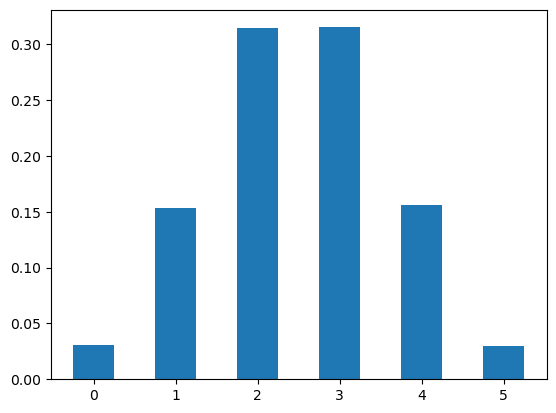

In [18]:
freqs,bins,fig = plt.hist(heads,bins=range(0,ncoins+2),density=True,align='left',rwidth=0.5)

Take a closer look at the values of the parameters entered in 

* `bins=range(0,ncoins+2)` specifies the limits of the bins are the integers from `0` to `ncoins+2` (exclusive). Therefore the bins in this case are $[0,1),[1,2),[2,3),[3,4),[4,5),[5,6)$.
* `density=True` specifies that the height of each bar is the relative frequency of each value as opposed to the total count of each value.
* `align='left'` and `rwidth=0.5` specify that the center of each bar is located at the edge of the bin and the width of each bar is 0.5 times the width of the bin.

Finally, the function `plt.hist` returns 3 objects:

* `freqs` is the array of relative frequencies (in other words, the height of each bar in the graph)
* `bins` is the array of limits of the bins
* `fig` is the Matplotlib figure object (in case we want to further modify or style the figure)

In [19]:
print(freqs)

[0.0306 0.1532 0.3148 0.3152 0.1562 0.03  ]


In [20]:
print(bins)

[0. 1. 2. 3. 4. 5. 6.]


We know that the probability of getting $k$ heads when flipping $n$ coins is given by

$$
\frac{n \choose k}{2^n}
$$

Therefore the histogram above should match approximately the figure below:

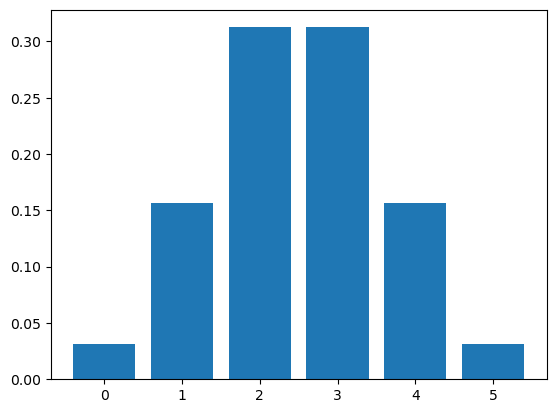

In [21]:
n = ncoins
k = np.arange(0,n+1)
b = sp.comb(n,k)
plt.bar(k,b/2**n)
plt.show()

In [22]:
print(b/2**n)

[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]


## Examples

### Rolling Dice

Generate 10000 random samples of the sum of 3 dice and construct the histogram.

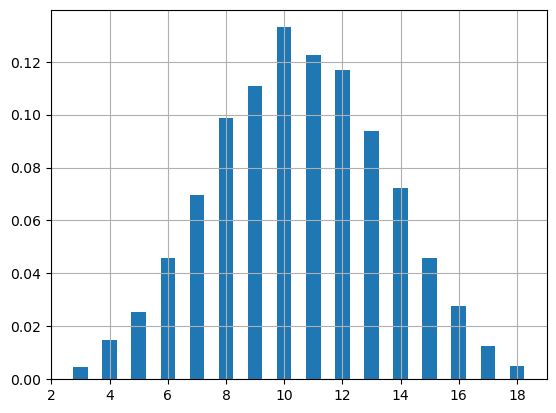

In [43]:
ndice = 3
nsides = 6
nsamples = 10000
samples = np.random.randint(1,nsides+1,size=(nsamples,ndice))
results = np.sum(samples,axis=1)
freqs,bins,fig = plt.hist(results,bins=range(ndice,nsides*ndice+2),density=True,align='left',rwidth=0.5)
plt.grid(True)
plt.show()

In [44]:
print("Relative Frequencies:",freqs)

Relative Frequencies: [0.0046 0.0147 0.0256 0.0459 0.0698 0.0987 0.1109 0.133  0.1226 0.117
 0.0939 0.0724 0.0458 0.0275 0.0126 0.005 ]


### Weighted Coin

Consider an unfair coin which flips to heads with probability 2/3. Generate 1000 random samples of 7 flips, count the number of heads and construct the histogram.

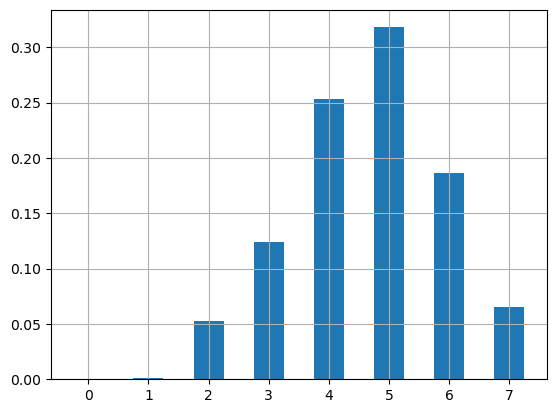

In [46]:
omega = [0,1]
probs = [1/3,2/3]
nsamples = 1000
nflips = 7
samples = np.random.choice(omega,size=(nsamples,nflips),p=probs)
results = np.sum(samples,axis=1)
freqs,bins,fig = plt.hist(results,bins=range(0,nflips+2),density=True,align='left',rwidth=0.5)
plt.grid(True)
plt.show()

In [48]:
print(freqs)

[0.    0.001 0.053 0.124 0.253 0.318 0.186 0.065]
